In [1]:
import numpy as np
from sympy import Matrix
from sympy import symbols
from sympy import lambdify
from sympy.solvers import solve

## Task 1: Golden ratio line search

In [2]:
def gsSearch(f,x=0,d=0,eps=10e-5):
  ''' perform golden ratio search
      input:
        f - the function to be evaluated
        x - current iteration optimization variable
        d - direction to search
        eps - small number that serves to terminate the search
      output:
        alpha - parameter to multiply by d to calculate the next x
  '''
  
#################################
# Start entering your code here #
#################################

  if x.ndim != 1:
    print ('The array x must be a one dimensional matrix')

  # Phase I - Bracketing
  delta = 0.05
  alpha = [0]
  
  tau = 0.618
  tauSumList = [0]

  for q in np.arange(0, 50):
    tauSumList.append((tau+1)**q*delta)

  for q in np.arange(0, 50):
    if q > 0:
      if f(x+alpha[q]*d)<f(x+alpha[q-1]*d):
        alpha.append(tauSumList[q+1])
      else:
        break
    else:
      alpha.append(tauSumList[q+1])

  # Phase II
  if len(alpha)>=3:
    xA = alpha[-3]
  else:
    xA = 0
  xD = alpha[-1]

  i = 0
  while (xD-xA)>eps and i<10000:
    xB = xA + (1-tau)*(xD-xA)
    xC = xA + tau*(xD-xA)
    if f(x+xB*d) <= f(x+xC*d):
      xD = xC
    elif f(x+xB*d) > f(x+xC*d):
      xA = xB
    i += 1
  alpha = (xD+xA)/2.

#################################
# End of your code              #
#################################

  return alpha

## Task 2: Steepest descent

In [3]:
def sd(f, x=0, der=0, eps=10e-5):
  ''' Steepest descent
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

  
#################################
# Start entering your code here #
#################################

  if x.ndim != 1:
    print ('The array x must be a one dimensional matrix')

  i=0
  c = der(x) # initialize the gradient at x0
  x_out = x # first x solution recorded

  while np.linalg.norm(c)>eps and i<10000:
    c = der(x) # differentiate
    cnorm = c / np.linalg.norm(c) # normalize the negative of the gradient
    d = -cnorm.transpose()[0] # transpose to n by 1
    alpha_s = gsSearch(f, x, d, eps) # find alpha using gsSearch

    x = x+alpha_s*d # update x

    x_out = np.vstack([x_out, x])
    i+=1

  
#################################
# End of your code              #
#################################

  return x_out

## Task 3: Conjugate Gradient

In [4]:
def cg(f, x=0, der=0, eps=10e-5):
  ''' Conjugate gradient
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

  if x.ndim != 1:
    print ('The array x must be a one dimensional matrix')

  i=0
  x_out = x

  while np.linalg.norm(der(x))>eps and i<1000:

    if i == 0: # first iteration
      c = der(x).transpose()[0]
      d = -c
    else: # all other iterations
      c_old = c
      c = der(x).transpose()[0]
      beta = np.matmul(c.transpose(),c)/np.matmul(c_old.transpose(),c_old)

      d = -c+beta*d

    alpha_s = gsSearch(f, x, d, eps)

    x = x+alpha_s*d

    x_out = np.vstack([x_out, x])
    
    i+=1
  
#################################
# End of your code              #
#################################

  return x_out

## Task 4: Modified Newton Method

In [5]:
def mn(f, x=0, der=0, hes=0, eps=10e-5):
  ''' Modified Newton Method
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        hes - analytical hessian of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

  if x.ndim != 1:
    print ('The array x must be a one dimensional matrix')

  i=0
  x_out = x

  while np.linalg.norm(der(x))>eps and i<10000:
      c = der(x)

      d = np.linalg.solve(hes(x), -c)
      d = d.transpose()[0]
      alpha_s = gsSearch(f, x, d, eps)

      x = x+alpha_s*d

      x_out = np.vstack([x_out, x])
      
      i+=1
  
#################################
# End of your code              #
#################################

  return x_out

## Test case 1: Quadratic function

In [6]:
#######################################
# Test case 1
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Objective function
def testFun(x):
  return x[0]**2+x[1]**2

# Derivative of the objective function
def testFunDer(x):
  return np.array([[2*x[0]], [2*x[1]]])

# Derivative of the objective function
def testFunHes(x):
  return np.array([[2, 0], [0, 2]])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([-25., 75.])

x_out_sd = sd(testFun,x0,testFunDer,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(testFun,x0,testFunDer,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

x_out_mn = mn(testFun,x0,testFunDer,testFunHes, 0.00001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))


Steepest descent gives: [ 1.05336132e-06 -3.16008395e-06]
Conjugate gradient gives: [-3.65281264e-16  1.09583024e-15]
Modified Newton gives: [ 1.66192436e-07 -4.98577307e-07]
Scipy gives: [ 2.24916603e-07 -7.06466337e-07]


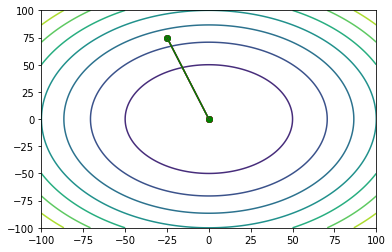

In [7]:
#######################################
# Test case 1
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Plot the contour and the optimization iteration
import matplotlib.pyplot as plt

n = 1000 # calculate for n data points 
val_x = np.linspace(-100.,100., n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# Plot the contour map
plt.contour(optVar_x0, optVar_x1, testFun([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x
plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.show()

## Test case 2: Box optimization

In [8]:
#######################################
# Test case 2
# Do not modify this code
# You may run it to test your algorithm
#######################################

v_req = 10**6

from sympy import symbols
from sympy import lambdify
from sympy import Matrix

# Define optimization variables
a, b = symbols('a b')

# Define the objective to minimize
box  = a*b+2*v_req/b+2*v_req/a 
dBox = Matrix([box.diff(x) for x in [a,b]]) # Calculate gradient
ddBox = Matrix([[y.diff(x) for y in dBox] for x in [a,b]]) # Calculate hessian

# lambdify the objective function
boxF = lambdify([a,b], box)
dBoxF = lambdify([a,b], dBox)
ddBoxF = lambdify([a,b], ddBox)

# Wrapper functions
def boxFW (x):
  return boxF(x[0],x[1])

def dBoxFW (x):
  return dBoxF(x[0],x[1])

def ddBoxFW (x):
  return ddBoxF(x[0],x[1])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([60., 200.])

x_out_sd = sd(boxFW,x0,dBoxFW,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(boxFW,x0,dBoxFW,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

x_out_mn = mn(boxFW,x0,dBoxFW,ddBoxFW,0.00001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(boxFW, x0)
print('Scipy gives: ' + str(res.x))


Steepest descent gives: [125.9921016  125.99210894]
Conjugate gradient gives: [125.99210784 125.99209876]
Modified Newton gives: [125.99210308 125.99210677]
Scipy gives: [125.99207898 125.99200824]


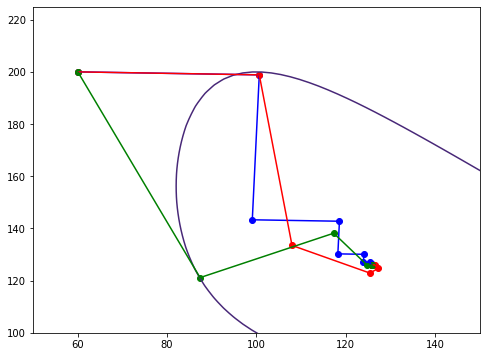

In [9]:
#######################################
# Test case 2
# Do not modify this code
# You may run it to check your algorithm
#######################################

n = 1000 # calculate for n data points 
val_x = np.linspace(10., 220., 100)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

import matplotlib.pyplot as plt
# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# Plot the contour map to show objective landscape
plt.contour(optVar_x0, optVar_x1, boxFW([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x_star values

plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.xlim([50,150])
plt.ylim([100,225])
plt.show()

## Test case 3: Wire optimization

In [10]:
#######################################
# Test case 3
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Set all the parameters
y_start = 50; x_start = 50; x_end = 50; y_end = 350; a = 500; b = 400; t = 75

from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
y1, y2 = symbols('y1 y2')

# Define the objective to minimize
length  = ((x_start-a)**2+(y_start-y1)**2)**0.5 + \
          ((y1-y2)**2+t**2)**0.5 + \
          ((a-x_end)**2+(y2-y_end)**2)**0.5

# Calculate gradient then cast to sympy matrix
dLength = Matrix([length.diff(x) for x in [y1,y2]]) 
ddLength = Matrix([[y.diff(x) for y in dLength] for x in [y1,y2]]) # Calculate hessian


# lambdify the objective function and the derivative
lengthF     = lambdify([y1,y2], length)
dLengthF     = lambdify([y1,y2], dLength)
ddLengthF     = lambdify([y1,y2], ddLength)

# define wrapper functions
def lengthFW (x):
  return lengthF(x[0],x[1])

def dLengthFW (x):
  return dLengthF(x[0],x[1])

def ddLengthFW (x):
  return ddLengthF(x[0],x[1])


#######################################
# execution of your optimization code #
#######################################
x0 = np.array([20., 200.])
x_out_sd = sd(lengthFW,x0,dLengthFW,0.00001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))

x_out_cg = cg(lengthFW,x0,dLengthFW,0.00001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))

x_out_mn = mn(lengthFW,x0,dLengthFW,ddLengthFW,0.00001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy minimize
from scipy.optimize import minimize
res = minimize(lengthFW, x0)
print('Scipy gives: ' + str(res.x))

Steepest descent gives: [188.46028803 211.53781933]
Conjugate gradient gives: [188.46148147 211.53840723]
Modified Newton gives: [188.46133198 211.53824201]
Scipy gives: [188.4599146  211.53729857]


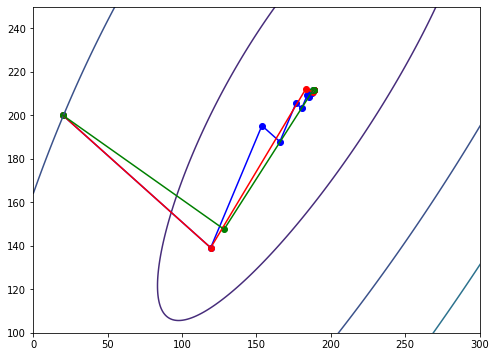

In [11]:
#######################################
# Test case 3
# Do not modify this code
# You may run it to check your algorithm
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 1000 
val_x = np.linspace(0., b, n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, lengthFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values

plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')


plt.xlim([0,300])
plt.ylim([100,250])

plt.show()

## Test case 4: Rosenbrock function


In [12]:
#######################################
# Test case 4
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Set all the parameters
a = 0; b = 100;

from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
x, y = symbols('x y')

# Define the objective to minimize
rosen = (a-x)**2+b*(y-x**2)**2
dRosen = Matrix([rosen.diff(x) for x in [x,y]]) 
ddRosen = Matrix([[y.diff(x) for y in dRosen] for x in [x,y]]) # Calculate hessian


# lambdify the objective function and the derivative
rosenF    = lambdify([x,y], rosen)
dRosenF   = lambdify([x,y], dRosen)
ddRosenF  = lambdify([x,y], ddRosen)

# define wrapper functions
def rosenFW (x):
  return rosenF(x[0],x[1])

def dRosenFW (x):
  return dRosenF(x[0],x[1])

def ddRosenFW (x):
  return ddRosenF(x[0],x[1])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([-25., 300.])
x_out_sd = sd(rosenFW,x0,dRosenFW,0.0000001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))
x_out_cg = cg(rosenFW,x0,dRosenFW,0.0000001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))
x_out_mn = mn(rosenFW,x0,dRosenFW,ddRosenFW,0.0000001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))

Steepest descent gives: [-0.76043643  0.57766065]
Conjugate gradient gives: [-0.12677852 -1.17406104]
Modified Newton gives: [1.42032772e-14 1.49580729e-15]
Scipy gives: [-1.99116201e-08 -2.53861406e-07]


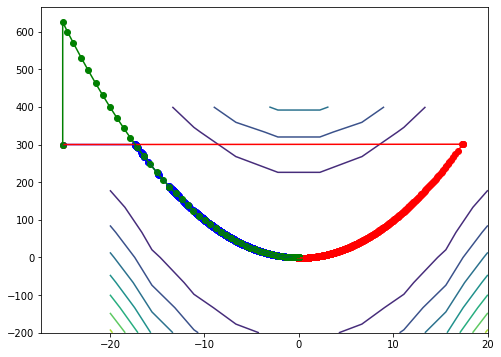

In [13]:
#######################################
# Test case 4
# Do not modify this code
# You may run it to check your algorithm
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 10

val_x0 = np.linspace(-20., 20., n)
val_x1 = np.linspace(-200., 400., n)

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x0, val_x1)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, rosenFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values
plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.show()

In [14]:
#######################################
# Test case 5
#######################################

# Set all the parameters
from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
x, y = symbols('x y')

# Define the objective to minimize
fun = x**2+0.5*y**2+0.25*x*y
dFun = Matrix([fun.diff(x) for x in [x,y]]) 
ddFun = Matrix([[y.diff(x) for y in dFun] for x in [x,y]]) # Calculate hessian


# lambdify the objective function and the derivative
funF    = lambdify([x,y], fun)
dFunF   = lambdify([x,y], dFun)
ddFunF  = lambdify([x,y], ddFun)

# define wrapper functions
def funFW (x):
  return funF(x[0],x[1])

def dFunFW (x):
  return dFunF(x[0],x[1])

def ddFunFW (x):
  return ddFunF(x[0],x[1])

# execution of your optimization code 
x0 = np.array([-10., 10.])
x_out_sd = sd(funFW,x0,dFunFW,0.0000001)
print('Steepest descent gives: ' + str(x_out_sd[-1]))
x_out_cg = cg(funFW,x0,dFunFW,0.0000001)
print('Conjugate gradient gives: ' + str(x_out_cg[-1]))
x_out_mn = mn(funFW,x0,dFunFW,ddFunFW,0.0000001)
print('Modified Newton gives: ' + str(x_out_mn[-1]))

print ('Steepest Descent')
print (x_out_sd)

print ('Conjugate Gradient')
print (x_out_cg)

print ('Modified Newton')
print (x_out_mn)
# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))

Steepest descent gives: [-8.69138713e-09  2.09038137e-08]
Conjugate gradient gives: [ 4.61641309e-08 -3.33036674e-08]
Modified Newton gives: [-2.314969e-15  2.314969e-15]
Steepest Descent
[[-1.00000000e+01  1.00000000e+01]
 [ 5.18134691e-01  5.49222799e+00]
 [-1.28497409e+00  1.28497408e+00]
 [ 6.65789612e-02  7.05737065e-01]
 [-1.65115838e-01  1.65115842e-01]
 [ 8.55521503e-03  9.06853881e-02]
 [-2.12169589e-02  2.12169485e-02]
 [ 1.09931853e-03  1.16528365e-02]
 [-2.72631509e-03  2.72633931e-03]
 [ 1.41245447e-04  1.49736868e-03]
 [-3.50334341e-04  3.50297115e-04]
 [ 1.81489970e-05  1.92400455e-04]
 [-4.50104682e-05  4.50217945e-05]
 [ 2.33070086e-06  2.47251851e-05]
 [-5.78338496e-06  5.78615807e-06]
 [ 2.93912939e-07  3.17975812e-06]
 [-7.50987530e-07  7.21417632e-07]
 [ 4.45263069e-08  4.00188946e-07]
 [-9.44817942e-08  9.78254871e-08]
 [ 1.58622542e-09  5.44916368e-08]
 [-8.69138713e-09  2.09038137e-08]]
Conjugate Gradient
[[-1.00000000e+01  1.00000000e+01]
 [ 5.18134547e-01  5.4

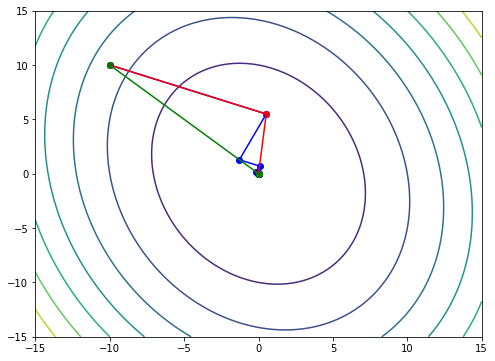

In [15]:
#######################################
# Test case 5
#######################################

import matplotlib.pyplot as plt
b = 15
# calculate for n data points 
n = 100 
val_x = np.linspace(-b, b, n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, funFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values

plt.scatter(x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.plot   (x_out_sd[:,0],x_out_sd[:,1], c='b')
plt.scatter(x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.plot   (x_out_cg[:,0],x_out_cg[:,1], c='r')
plt.scatter(x_out_mn[:,0],x_out_mn[:,1], c='g')
plt.plot   (x_out_mn[:,0],x_out_mn[:,1], c='g')

plt.show()